In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sys import path
path.append('../../src/')
#path.append('../../../src/tools')
import numpy as np

#from numpy import *
import scipy as sp
from spatiallyAdaptiveExtendSplit import *
from spatiallyAdaptiveSingleDimension2 import *
from spatiallyAdaptiveCell import *

from PerformTestCase import *
from Function import *
from ErrorCalculator import *
from Utils import *
import math
dim = 5
a = 0
b = 1
grid=TrapezoidalGrid(np.ones(dim)*a, np.ones(dim)*b, modified_basis=False, boundary=True)
grid_single_dim = GlobalBSplineGrid(a=a*np.ones(dim), b=b*np.ones(dim), p=3, modified_basis=False, boundary=True)
grid_single_dim2 = GlobalLagrangeGrid(a=a*np.ones(dim), b=b*np.ones(dim), p=3, modified_basis=False, boundary=True)
grid_single_dim_lin = GlobalTrapezoidalGrid(a=a*np.ones(dim), b=b*np.ones(dim), modified_basis=False, boundary=True)


Cannot plot function with dim > 2
Exact integral 1.1714979705007044e-06
Reference solution: 1.1714979705007044e-06
0 [1, 1, 1, 1, 2] 1.0
1 [1, 1, 1, 2, 1] 1.0
2 [1, 1, 2, 1, 1] 1.0
3 [1, 2, 1, 1, 1] 1.0
4 [2, 1, 1, 1, 1] 1.0
5 [1, 1, 1, 1, 1] -4.0
Curent number of function evaluations 1053
max surplus error: 0.00021013378332262724 total surplus error: 0.0020986540522602917
combiintegral: -0.001258118918969234


/home/oberstei/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Current error: 1074.9403316520534
Finished refinement
Refined  10  times
New lmax: [3, 2, 2, 2, 2]
New lmax: [3, 3, 2, 2, 2]
New lmax: [3, 3, 3, 2, 2]
New lmax: [3, 3, 3, 3, 2]
New lmax: [3, 3, 3, 3, 3]
Curent number of function evaluations 2133
max surplus error: 0.00010489915534984537 total surplus error: 0.0011985105877759803
combiintegral: -5.960833120911878e-05
Current error: 51.88214637165941
Finished refinement
Refined  12  times
Rebalancing!
New lmax: [4, 3, 3, 3, 3]
New lmax: [4, 4, 3, 3, 3]
New lmax: [4, 4, 4, 3, 3]
New lmax: [4, 4, 4, 4, 3]
New lmax: [4, 4, 4, 4, 4]
Curent number of function evaluations 4059
max surplus error: 5.929818990452917e-05 total surplus error: 0.0006059230689235227
combiintegral: -0.0002996827866031095
Current error: 256.81161397575744
Finished refinement
Refined  8  times
Rebalancing!
Rebalancing!
Rebalancing!
Rebalancing!
Curent number of function evaluations 7530
max surplus error: 1.6145684356118059e-06 total surplus error: 2.029683763604257e-05

Curent number of function evaluations 377621
max surplus error: 5.3000022655787485e-09 total surplus error: 2.547661263627224e-07
combiintegral: 1.0715923195476354e-06
Current error: 0.08528025952137913
Finished refinement
Refined  14  times
Rebalancing!
Curent number of function evaluations 397207
max surplus error: 2.416552116410477e-09 total surplus error: 2.0818973353963942e-07
combiintegral: 1.0746157206438705e-06
Current error: 0.0826994602606319
Finished refinement
Refined  46  times
Rebalancing!
Curent number of function evaluations 463222
max surplus error: 3.7026120243825785e-09 total surplus error: 2.1424101258089097e-07
combiintegral: 1.175645202070677e-06
Current error: 0.0035401099057815293
Finished refinement
Refined  20  times
Rebalancing!
Curent number of function evaluations 488325
max surplus error: 1.8218617526337727e-09 total surplus error: 1.5788370727098284e-07
combiintegral: 1.1902917649073303e-06
Current error: 0.016042532620516022
Finished refinement
Refined  

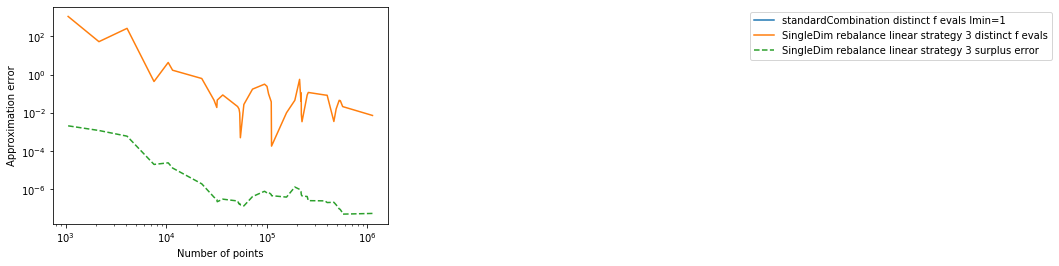

In [2]:
midpoints = np.ones(dim) * 0.99
coefficients = np.array([10**2 * (d+1) for d in range(dim)])
f = GenzGaussian(midpoints,coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorExtendSplit()
errorOperatorSingleDim = ErrorCalculatorSingleDimVolumeGuided()

reference_solution = f.getAnalyticSolutionIntegral(np.ones(dim)*a, np.ones(dim)*b)

#operation = Integration(f=f, grid=None, dim=dim, reference_solution=reference_solution)
#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, no_initial_splitting=False,version=0, automatic_extend_split=True)
from GridOperation import *
operationSingleDim = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
operationSingleDim2 = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5)
adaptiveCombiInstanceSingleDim3 = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5, rebalancing=False)

#operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)

#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0, automatic_extend_split=True)

#adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0)
#adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(np.ones(dim)*a, np.ones(dim)*b,grid, operation=operation)

algorithmArray = [(adaptiveCombiInstanceSingleDim,1,2, errorOperatorSingleDim, 'SingleDim rebalance linear strategy 3')]
evaluation_points = get_cross_product_list([np.linspace(a, b, 11)[1:-1] for d in range(dim)])
#print(evaluation_points)
performTestcaseArbitraryDim(f,a*np.ones(dim),b*np.ones(dim),algorithmArray,10,dim,1,grid,1,2, max_evaluations=1000000, evaluation_points = evaluation_points )


Cannot plot function with dim > 2
Exact integral 1.1714979705007044e-06
Reference solution: 1.1714979705007044e-06
0 [1, 1, 1, 1, 2] 1.0
1 [1, 1, 1, 2, 1] 1.0
2 [1, 1, 2, 1, 1] 1.0
3 [1, 2, 1, 1, 1] 1.0
4 [2, 1, 1, 1, 1] 1.0
5 [1, 1, 1, 1, 1] -4.0
Curent number of function evaluations 1053
max surplus error: 0.00021013378332262724 total surplus error: 0.0020986540522602917
combiintegral: -0.001258118918969234


/home/oberstei/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Current error: 1074.9403316520534
Finished refinement
Refined  10  times
New lmax: [3, 2, 2, 2, 2]
New lmax: [3, 3, 2, 2, 2]
New lmax: [3, 3, 3, 2, 2]
New lmax: [3, 3, 3, 3, 2]
New lmax: [3, 3, 3, 3, 3]
Curent number of function evaluations 2133
max surplus error: 0.00010489915534984537 total surplus error: 0.0011985105877759803
combiintegral: -5.960833120911878e-05
Current error: 51.88214637165941
Finished refinement
Refined  12  times
New lmax: [4, 3, 3, 3, 3]
New lmax: [4, 4, 3, 3, 3]
New lmax: [4, 4, 4, 3, 3]
New lmax: [4, 4, 4, 4, 3]
New lmax: [4, 4, 4, 4, 4]
Curent number of function evaluations 3843
max surplus error: 0.00013694837838489857 total surplus error: 0.0016772202433193283
combiintegral: -0.0009016005648437068
Current error: 770.6134244759792
Finished refinement
Refined  8  times
Curent number of function evaluations 4923
max surplus error: 4.333884416043283e-05 total surplus error: 0.0007321273158131989
combiintegral: 0.0006000205266532355
Current error: 511.182301431

Current error: 1.4669631482234082
Finished refinement
Refined  6  times
Curent number of function evaluations 230606
max surplus error: 1.0034439484974223e-08 total surplus error: 6.423460197997372e-07
combiintegral: 2.909957126527298e-06
Current error: 1.483962584487933
Finished refinement
Refined  4  times
Curent number of function evaluations 231146
max surplus error: 4.4053419664998406e-09 total surplus error: 6.068272328838443e-07
combiintegral: 2.9414062724794454e-06
Current error: 1.5108078260026971
Finished refinement
Refined  58  times
Curent number of function evaluations 241332
max surplus error: 4.067212698469205e-09 total surplus error: 4.7065114967699445e-07
combiintegral: 3.147032078586009e-06
Current error: 1.6863316521504093
Finished refinement
Refined  20  times
Curent number of function evaluations 244356
max surplus error: 2.317772214970485e-09 total surplus error: 4.016304445745278e-07
combiintegral: 3.148555962036534e-06
Current error: 1.6876324512033294
Finished 

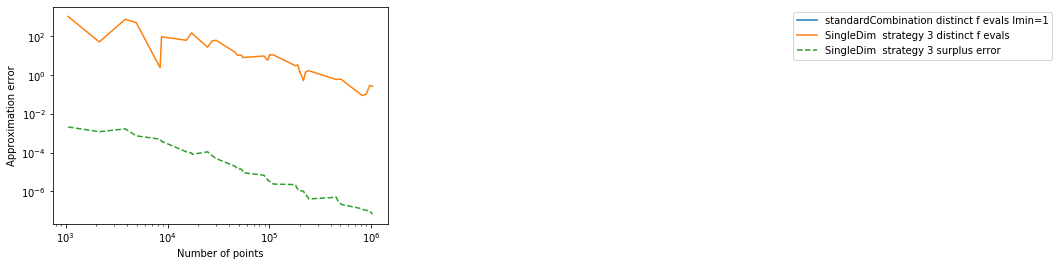

In [ ]:
midpoints = np.ones(dim) * 0.99
coefficients = np.array([10**2 * (d+1) for d in range(dim)])
f = GenzGaussian(midpoints,coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorExtendSplit()
errorOperatorSingleDim = ErrorCalculatorSingleDimVolumeGuided()

reference_solution = f.getAnalyticSolutionIntegral(np.ones(dim)*a, np.ones(dim)*b)

#operation = Integration(f=f, grid=None, dim=dim, reference_solution=reference_solution)
#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, no_initial_splitting=False,version=0, automatic_extend_split=True)
from GridOperation import *
operationSingleDim = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
operationSingleDim2 = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5)
adaptiveCombiInstanceSingleDim3 = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5, rebalancing=False)

#operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)

#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0, automatic_extend_split=True)

#adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0)
#adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(np.ones(dim)*a, np.ones(dim)*b,grid, operation=operation)

algorithmArray = [(adaptiveCombiInstanceSingleDim3,1,2, errorOperatorSingleDim, 'SingleDim  strategy 3')]
evaluation_points = get_cross_product_list([np.linspace(a, b, 11)[1:-1] for d in range(dim)])
#print(evaluation_points)
performTestcaseArbitraryDim(f,a*np.ones(dim),b*np.ones(dim),algorithmArray,10,dim,1,grid,1,2, max_evaluations=1000000, evaluation_points = evaluation_points )


In [ ]:
midpoints = np.ones(dim) * 0.99
coefficients = np.array([10**2 * (d+1) for d in range(dim)])
f = GenzGaussian(midpoints,coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorExtendSplit()
errorOperatorSingleDim = ErrorCalculatorSingleDimVolumeGuided()

reference_solution = f.getAnalyticSolutionIntegral(np.ones(dim)*a, np.ones(dim)*b)

#operation = Integration(f=f, grid=None, dim=dim, reference_solution=reference_solution)
#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, no_initial_splitting=False,version=0, automatic_extend_split=True)
from GridOperation import *
operationSingleDim = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
operationSingleDim2 = Integration(f=f, grid=grid_single_dim_lin, dim=dim, reference_solution=reference_solution)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5)
adaptiveCombiInstanceSingleDim3 = SpatiallyAdaptiveSingleDimensions2(np.ones(dim) * a, np.ones(dim) * b, dim_adaptive=True, version=6, operation=operationSingleDim, margin=0.5, rebalancing=False)

#operation = Integration(f=f, grid=grid, dim=dim, reference_solution=reference_solution)

#adaptiveCombiInstanceExtend2 = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0, automatic_extend_split=True)

#adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(np.ones(dim)*a, np.ones(dim)*b,0,grid, operation=operation, no_initial_splitting=False,version=0)
#adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(np.ones(dim)*a, np.ones(dim)*b,grid, operation=operation)

algorithmArray = []#[(adaptiveCombiInstanceSingleDim,1,2, errorOperatorSingleDim, 'SingleDim rebalance linear strategy 3'), (adaptiveCombiInstanceSingleDim3,1,2, errorOperatorSingleDim, 'SingleDim  strategy 3')]
evaluation_points = get_cross_product_list([np.linspace(a, b, 11)[1:-1] for d in range(dim)])
#print(evaluation_points)
performTestcaseArbitraryDim(f,a*np.ones(dim),b*np.ones(dim),algorithmArray,10,dim,9,grid,1,2, max_evaluations=1000000, evaluation_points = evaluation_points )


Cannot plot function with dim > 2
Exact integral 1.1714979705007044e-06
0 [1, 1, 1, 1, 2] 1.0
1 [1, 1, 1, 2, 1] 1.0
2 [1, 1, 2, 1, 1] 1.0
3 [1, 2, 1, 1, 1] 1.0
4 [2, 1, 1, 1, 1] 1.0
5 [1, 1, 1, 1, 1] -4.0
CombiSolution [-0.00125812]
Analytic Solution 1.1714979705007044e-06
Difference 0.0012592904169397346
0 [1, 1, 1, 1, 3] 1.0
1 [1, 1, 1, 2, 2] 1.0
2 [1, 1, 1, 3, 1] 1.0
3 [1, 1, 2, 1, 2] 1.0
4 [1, 1, 2, 2, 1] 1.0
5 [1, 1, 3, 1, 1] 1.0
6 [1, 2, 1, 1, 2] 1.0
7 [1, 2, 1, 2, 1] 1.0
8 [1, 2, 2, 1, 1] 1.0
9 [1, 3, 1, 1, 1] 1.0
10 [2, 1, 1, 1, 2] 1.0
11 [2, 1, 1, 2, 1] 1.0
12 [2, 1, 2, 1, 1] 1.0
13 [2, 2, 1, 1, 1] 1.0
14 [3, 1, 1, 1, 1] 1.0
15 [1, 1, 1, 1, 2] -4.0
16 [1, 1, 1, 2, 1] -4.0
17 [1, 1, 2, 1, 1] -4.0
18 [1, 2, 1, 1, 1] -4.0
19 [2, 1, 1, 1, 1] -4.0
20 [1, 1, 1, 1, 1] 6.0
CombiSolution [-5.96083312e-05]
Analytic Solution 1.1714979705007044e-06
Difference 6.077982915582038e-05
0 [1, 1, 1, 1, 4] 1.0
1 [1, 1, 1, 2, 3] 1.0
2 [1, 1, 1, 3, 2] 1.0
3 [1, 1, 1, 4, 1] 1.0
4 [1, 1, 2, 1, 3] 1.0

CombiSolution [-0.00016004]
Analytic Solution 1.1714979705007044e-06
Difference 0.0001612128087467836
0 [1, 1, 1, 1, 7] 1.0
1 [1, 1, 1, 2, 6] 1.0
2 [1, 1, 1, 3, 5] 1.0
3 [1, 1, 1, 4, 4] 1.0
4 [1, 1, 1, 5, 3] 1.0
5 [1, 1, 1, 6, 2] 1.0
6 [1, 1, 1, 7, 1] 1.0
7 [1, 1, 2, 1, 6] 1.0
8 [1, 1, 2, 2, 5] 1.0
9 [1, 1, 2, 3, 4] 1.0
10 [1, 1, 2, 4, 3] 1.0
11 [1, 1, 2, 5, 2] 1.0
12 [1, 1, 2, 6, 1] 1.0
13 [1, 1, 3, 1, 5] 1.0
14 [1, 1, 3, 2, 4] 1.0
15 [1, 1, 3, 3, 3] 1.0
16 [1, 1, 3, 4, 2] 1.0
17 [1, 1, 3, 5, 1] 1.0
18 [1, 1, 4, 1, 4] 1.0
19 [1, 1, 4, 2, 3] 1.0
20 [1, 1, 4, 3, 2] 1.0
21 [1, 1, 4, 4, 1] 1.0
22 [1, 1, 5, 1, 3] 1.0
23 [1, 1, 5, 2, 2] 1.0
24 [1, 1, 5, 3, 1] 1.0
25 [1, 1, 6, 1, 2] 1.0
26 [1, 1, 6, 2, 1] 1.0
27 [1, 1, 7, 1, 1] 1.0
28 [1, 2, 1, 1, 6] 1.0
29 [1, 2, 1, 2, 5] 1.0
30 [1, 2, 1, 3, 4] 1.0
31 [1, 2, 1, 4, 3] 1.0
32 [1, 2, 1, 5, 2] 1.0
33 [1, 2, 1, 6, 1] 1.0
34 [1, 2, 2, 1, 5] 1.0
35 [1, 2, 2, 2, 4] 1.0
36 [1, 2, 2, 3, 3] 1.0
37 [1, 2, 2, 4, 2] 1.0
38 [1, 2, 2, 5, 1] 1.0
39 [1, 2, 3

CombiSolution [-6.14154721e-05]
Analytic Solution 1.1714979705007044e-06
Difference 6.258697007053723e-05
0 [1, 1, 1, 1, 8] 1.0
1 [1, 1, 1, 2, 7] 1.0
2 [1, 1, 1, 3, 6] 1.0
3 [1, 1, 1, 4, 5] 1.0
4 [1, 1, 1, 5, 4] 1.0
5 [1, 1, 1, 6, 3] 1.0
6 [1, 1, 1, 7, 2] 1.0
7 [1, 1, 1, 8, 1] 1.0
8 [1, 1, 2, 1, 7] 1.0
9 [1, 1, 2, 2, 6] 1.0
10 [1, 1, 2, 3, 5] 1.0
11 [1, 1, 2, 4, 4] 1.0
12 [1, 1, 2, 5, 3] 1.0
13 [1, 1, 2, 6, 2] 1.0
14 [1, 1, 2, 7, 1] 1.0
15 [1, 1, 3, 1, 6] 1.0
16 [1, 1, 3, 2, 5] 1.0
17 [1, 1, 3, 3, 4] 1.0
18 [1, 1, 3, 4, 3] 1.0
19 [1, 1, 3, 5, 2] 1.0
20 [1, 1, 3, 6, 1] 1.0
21 [1, 1, 4, 1, 5] 1.0
22 [1, 1, 4, 2, 4] 1.0
23 [1, 1, 4, 3, 3] 1.0
24 [1, 1, 4, 4, 2] 1.0
25 [1, 1, 4, 5, 1] 1.0
26 [1, 1, 5, 1, 4] 1.0
27 [1, 1, 5, 2, 3] 1.0
28 [1, 1, 5, 3, 2] 1.0
29 [1, 1, 5, 4, 1] 1.0
30 [1, 1, 6, 1, 3] 1.0
31 [1, 1, 6, 2, 2] 1.0
32 [1, 1, 6, 3, 1] 1.0
33 [1, 1, 7, 1, 2] 1.0
34 [1, 1, 7, 2, 1] 1.0
35 [1, 1, 8, 1, 1] 1.0
36 [1, 2, 1, 1, 7] 1.0
37 [1, 2, 1, 2, 6] 1.0
38 [1, 2, 1, 3, 5] 1.0
39 [1, 

CombiSolution [1.51796297e-05]
Analytic Solution 1.1714979705007044e-06
Difference 1.4008131702755146e-05
0 [1, 1, 1, 1, 9] 1.0
1 [1, 1, 1, 2, 8] 1.0
2 [1, 1, 1, 3, 7] 1.0
3 [1, 1, 1, 4, 6] 1.0
4 [1, 1, 1, 5, 5] 1.0
5 [1, 1, 1, 6, 4] 1.0
6 [1, 1, 1, 7, 3] 1.0
7 [1, 1, 1, 8, 2] 1.0
8 [1, 1, 1, 9, 1] 1.0
9 [1, 1, 2, 1, 8] 1.0
10 [1, 1, 2, 2, 7] 1.0
11 [1, 1, 2, 3, 6] 1.0
12 [1, 1, 2, 4, 5] 1.0
13 [1, 1, 2, 5, 4] 1.0
14 [1, 1, 2, 6, 3] 1.0
15 [1, 1, 2, 7, 2] 1.0
16 [1, 1, 2, 8, 1] 1.0
17 [1, 1, 3, 1, 7] 1.0
18 [1, 1, 3, 2, 6] 1.0
19 [1, 1, 3, 3, 5] 1.0
20 [1, 1, 3, 4, 4] 1.0
21 [1, 1, 3, 5, 3] 1.0
22 [1, 1, 3, 6, 2] 1.0
23 [1, 1, 3, 7, 1] 1.0
24 [1, 1, 4, 1, 6] 1.0
25 [1, 1, 4, 2, 5] 1.0
26 [1, 1, 4, 3, 4] 1.0
27 [1, 1, 4, 4, 3] 1.0
28 [1, 1, 4, 5, 2] 1.0
29 [1, 1, 4, 6, 1] 1.0
30 [1, 1, 5, 1, 5] 1.0
31 [1, 1, 5, 2, 4] 1.0
32 [1, 1, 5, 3, 3] 1.0
33 [1, 1, 5, 4, 2] 1.0
34 [1, 1, 5, 5, 1] 1.0
35 [1, 1, 6, 1, 4] 1.0
36 [1, 1, 6, 2, 3] 1.0
37 [1, 1, 6, 3, 2] 1.0
38 [1, 1, 6, 4, 1] 1.0
39 [1, 

CombiSolution [1.47793758e-05]
Analytic Solution 1.1714979705007044e-06
Difference 1.3607877871265943e-05
